<div style="text-align: justify">
<b><h1>SLP - Single-layer Perceptron</h1></b>
<br>

The idea is that the algorithm is able to find a set of ideal weights, so that the network correctly classifies the inputs.
<br>
<br>
For this, if the network response is not the expected response, a weight adjustment is performed.
<br>
<br>
<b>Network features:</b>
<br>
<br>
• Linear classifier, ie, performs classification of linearly separable sets (labeled in this example as -1 and 1).
<br>
• Supervised learning.
<br>
<br>
<b><h2>Imports</h2></b>
<br>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

<div style="text-align: justify">
<b><h2>Configuration of Single-layer Perceptron</h2></b>
<br>
The Single-layer Perceptron setting is set here for convenience so you can find and change these numbers with ease.
<br>
<br>
The Weights are initialized as zeros, the Threshold and Bias are respectively set to 0 and 1, following the parameters of Chapter 3 of the Book: BEALE, Russell; JACKSON, Tom. Neural Computing-an introduction. CRC Press, 1990.
</div>

In [2]:
# Weights (Synapses)
w = [0,0]

# Theshold
threshold = 0

# Bias
bias = 1

# Learning rate - [0, 1]
learning_rate = 1

# Maximum number allowed of iterations
max_iterations = 100

In [3]:
# Inputs and Labels
x = [
    [0.72,0.82,-1],
    [0.91,-0.69,-1],
    [0.03,0.93,-1],
    [0.12,0.25,-1],
    [0.96,0.47,-1],
    [0.8,-0.75,-1],
    [0.46,0.98,-1],
    [0.66,0.24,-1],
    [0.72,-0.15,-1],
    [0.35,0.01,-1],
    [-0.11,0.1,1],
    [0.31,-0.96,1],
    [0.0,-0.26,1],
    [-0.43,-0.65,1],
    [0.57,-0.97,1],
    [-0.72,-0.64,1],
    [-0.25,-0.43,1],
    [-0.12,-0.9,1],
    [-0.58,0.62,1],
    [-0.77,-0.76,1]
]

In [4]:
# Output
y = 0

In [5]:
# Color - Red or Blue, 1 and -1, respectively
color = ""

In [6]:
# Answer = Correct or Error
answer = ""

In [7]:
# Data Dictionary
data_dictionary = {
    # 'Keys' : 'Values',
    '0.72,0.82' : '-1',
    '0.91,-0.69' : '-1',
    '0.03,0.93' : '-1',
    '0.12,0.25' : '-1',
    '0.96,0.47' : '-1',
    '0.8,-0.75' : '-1',
    '0.46,0.98' : '-1',
    '0.66,0.24' : '-1',
    '0.72,-0.15' : '-1',
    '0.35,0.01' : '-1',
    '-0.11,0.1' : '1',
    '0.31,-0.96' : '1',
    '0.0,-0.26' : '1',
    '-0.43,-0.65' : '1',
    '0.57,-0.97' : '1',
    '-0.72,-0.64' : '1',
    '-0.25,-0.43' : '1',
    '-0.12,-0.9' : '1',
    '-0.58,0.62' : '1',
    '-0.77,-0.76' : '1'
}

<div style="text-align: justify">
<b><h2>
Helper-function for plotting red and blue points</h2></b>
<br>
Stores the x and y coordinates for each point of the graph in their respective vectors.
</div>

In [8]:
def get_points_of_color(data, label):
    x_coords = [float(point.split(",")[0]) for point in data.keys() if data[point] == label]
    y_coords = [float(point.split(",")[1]) for point in data.keys() if data[point] == label]
    return x_coords, y_coords


------------------------- ITERATION 1 ------------------------- 

Error - Updating weight to: [-0.72, -0.82]


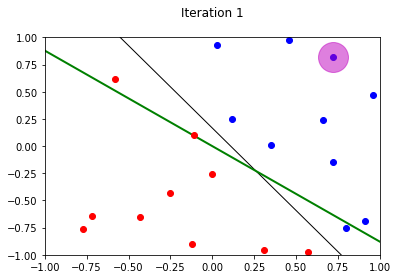


Correct!


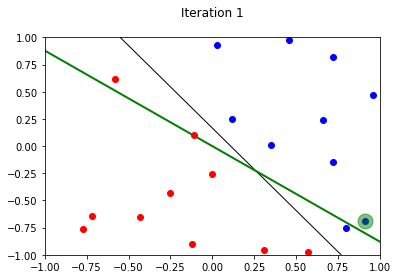


Correct!


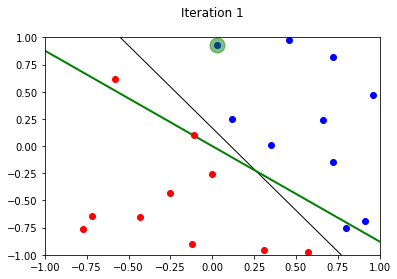


Correct!


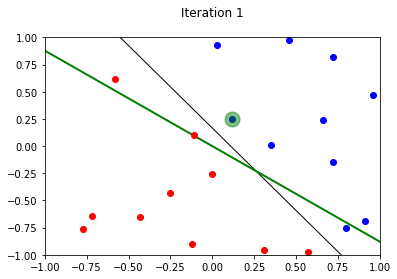


Correct!


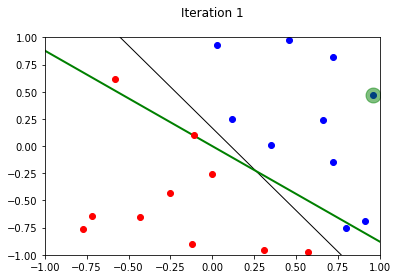


Error - Updating weight to: [-1.52, -0.06999999999999995]


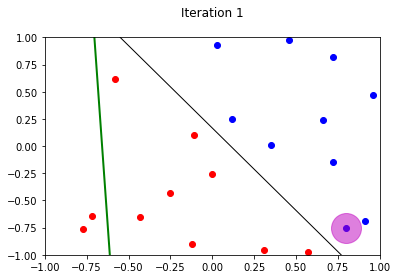


Correct!


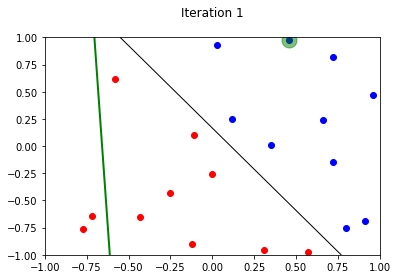


Correct!


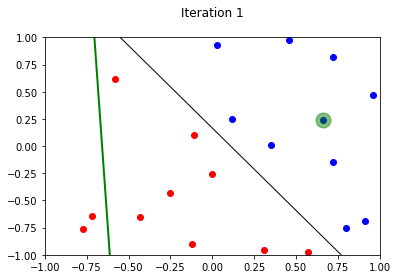


Correct!


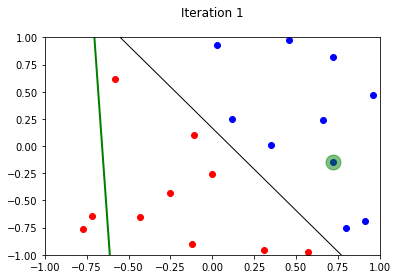


Correct!


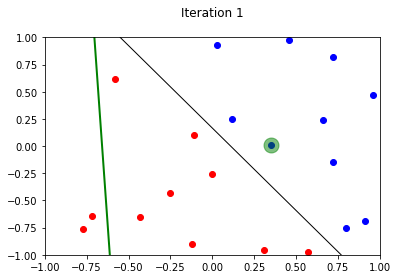


Error - Updating weight to: [-1.6300000000000001, 0.030000000000000054]


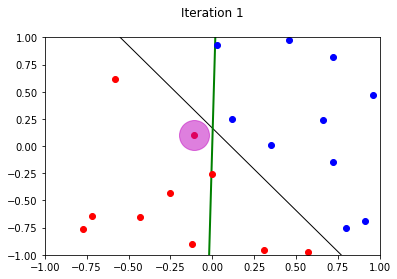


Error - Updating weight to: [-1.32, -0.9299999999999999]


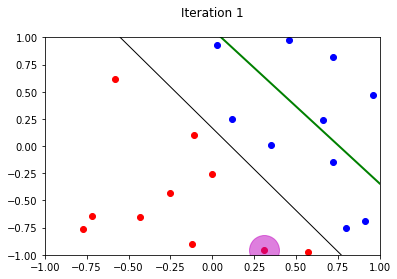


Correct!


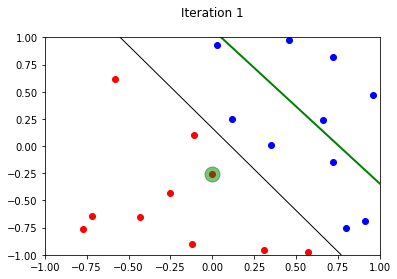


Correct!


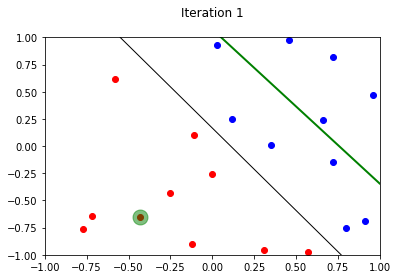


Correct!


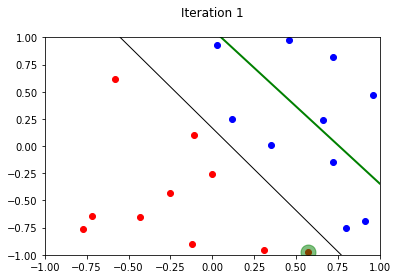


Correct!


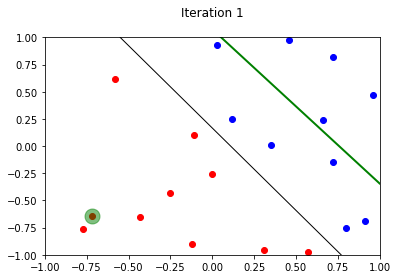


Correct!


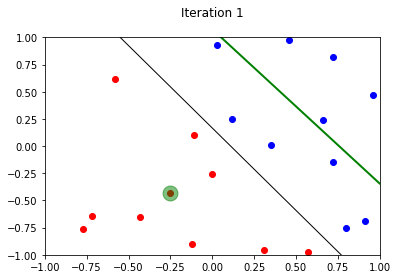


Correct!


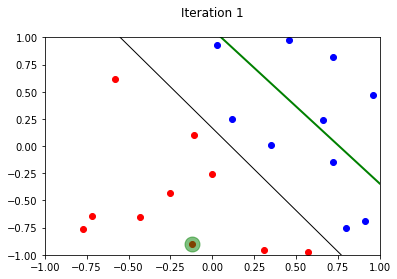


Correct!


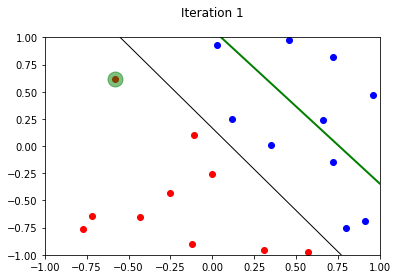


Correct!


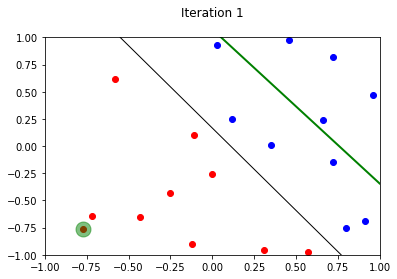


------------------------- ITERATION 2 ------------------------- 

Correct!


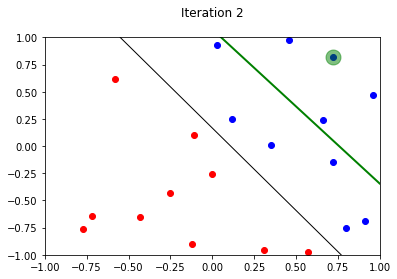


Error - Updating weight to: [-2.23, -0.24]


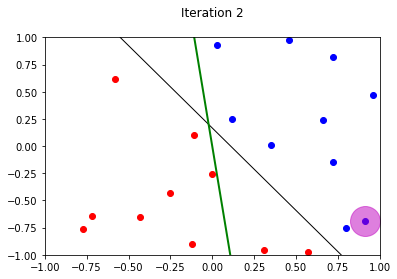


Correct!


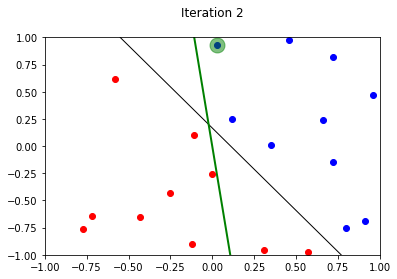


Correct!


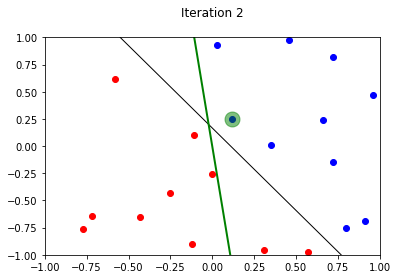


Correct!


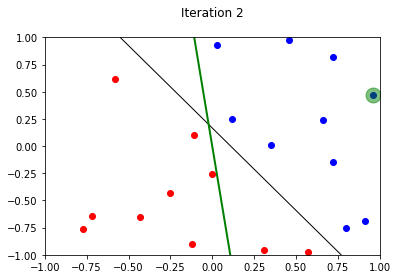


Correct!


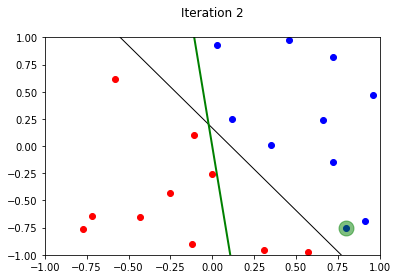


Correct!


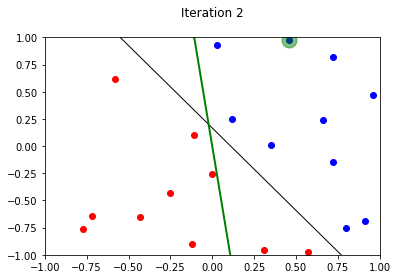


Correct!


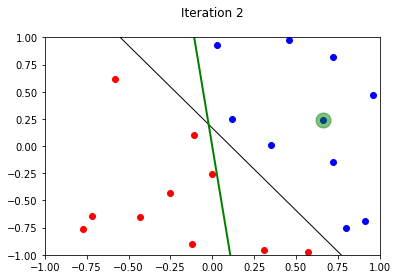


Correct!


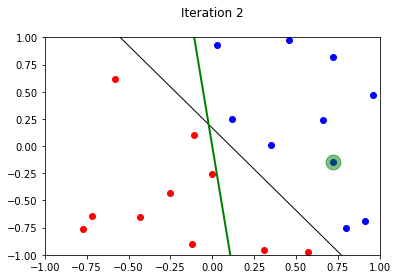


Correct!


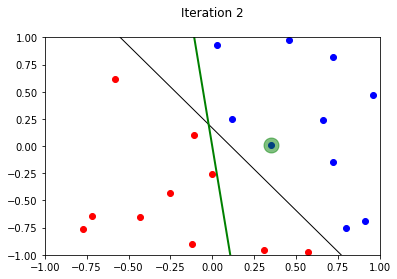


Correct!


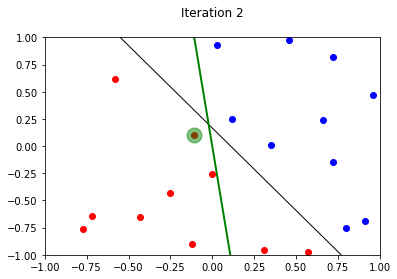


Error - Updating weight to: [-1.92, -1.2]


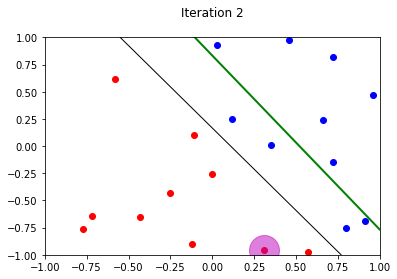


Correct!


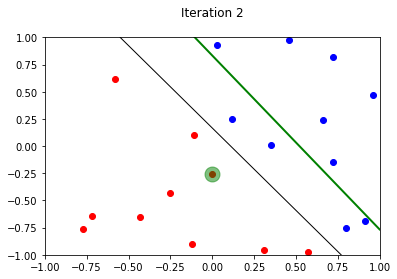


Correct!


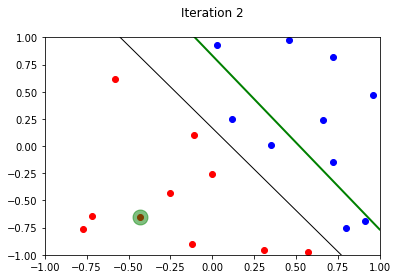


Correct!


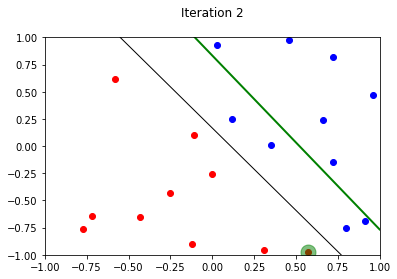


Correct!


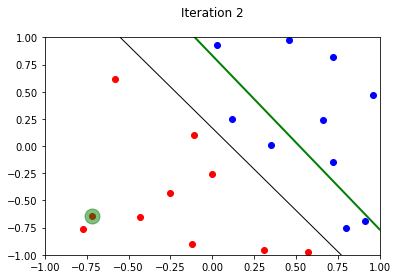


Correct!


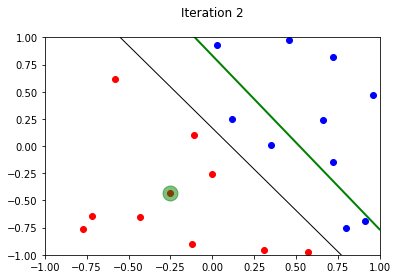


Correct!


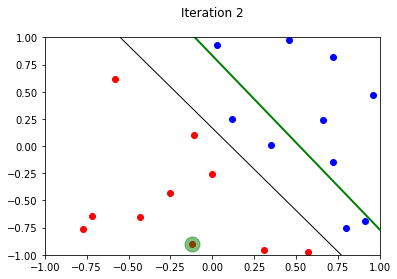


Correct!


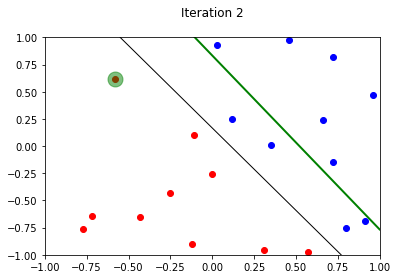


Correct!


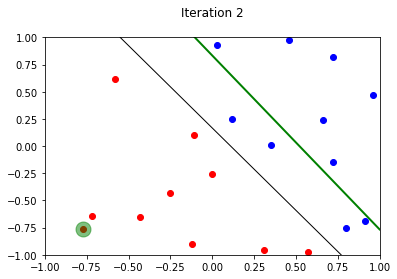


------------------------- ITERATION 3 ------------------------- 

Correct!


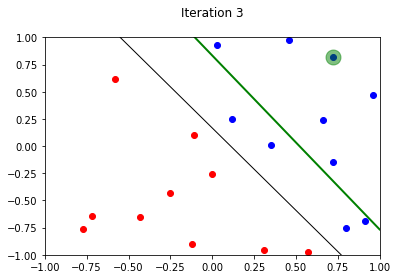


Error - Updating weight to: [-2.83, -0.51]


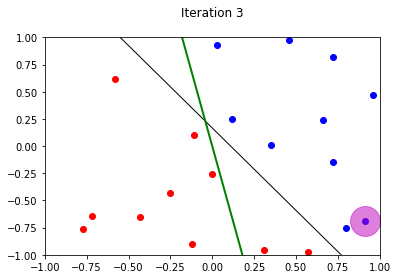


Correct!


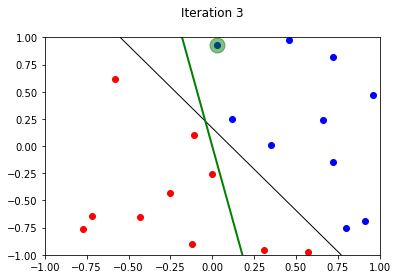


Correct!


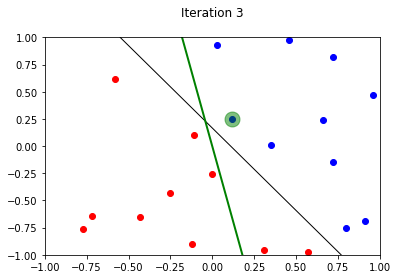


Correct!


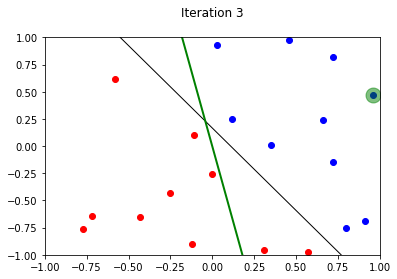


Correct!


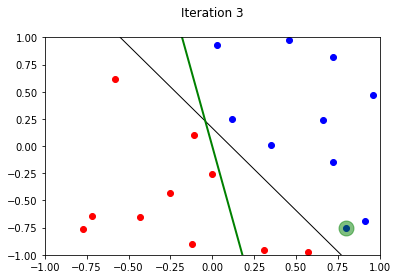


Correct!


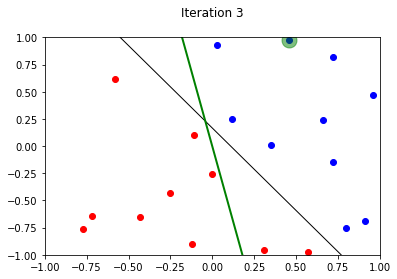


Correct!


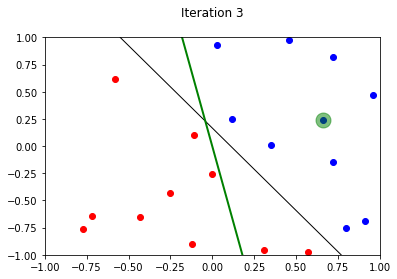


Correct!


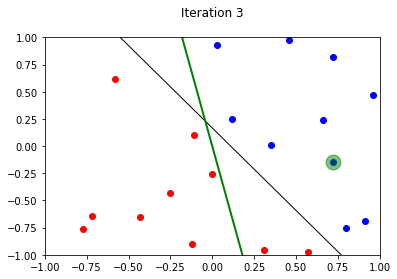


Correct!


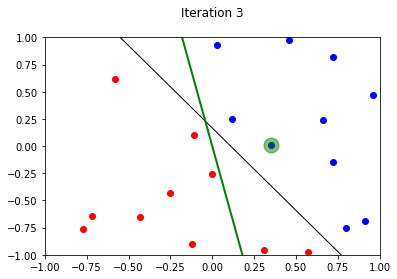


Correct!


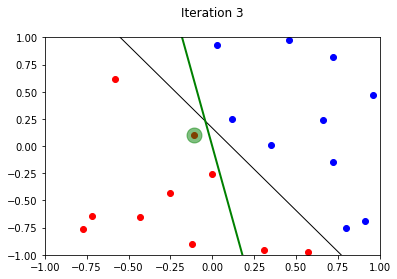


Error - Updating weight to: [-2.52, -1.47]


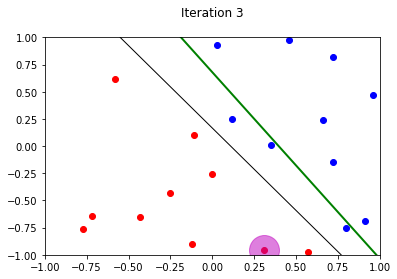


Correct!


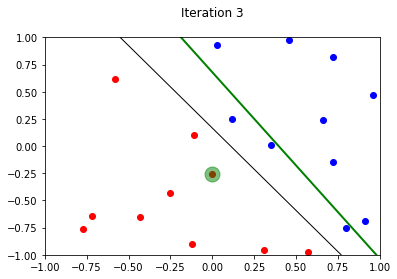


Correct!


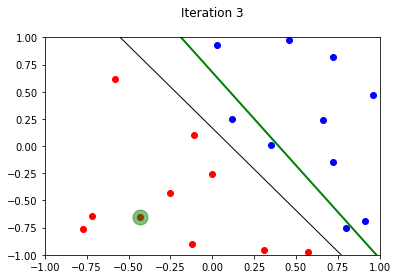


Correct!


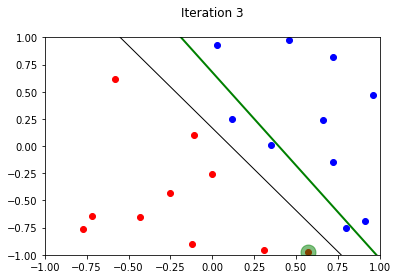


Correct!


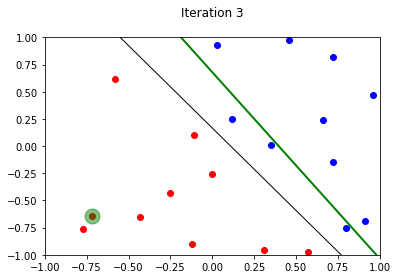


Correct!


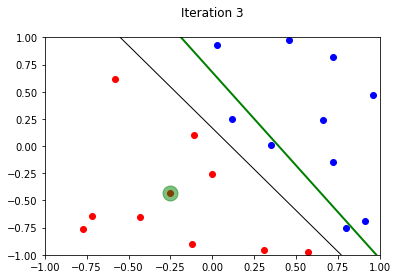


Correct!


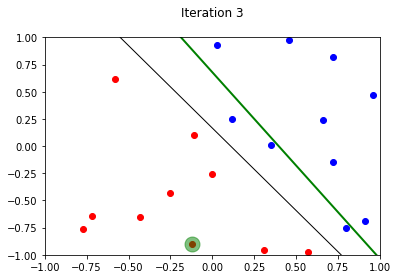


Correct!


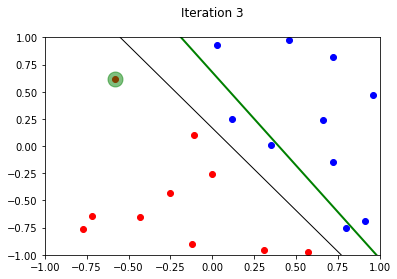


Correct!


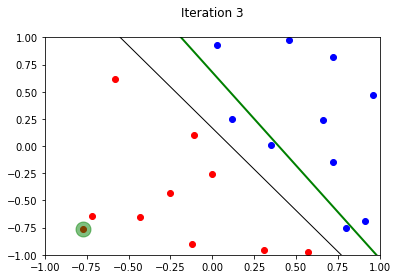


------------------------- ITERATION 4 ------------------------- 

Correct!


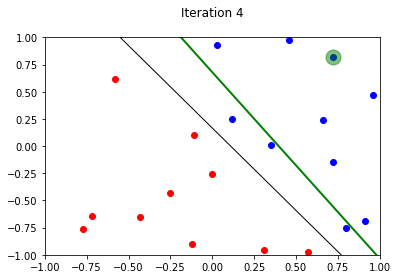


Correct!


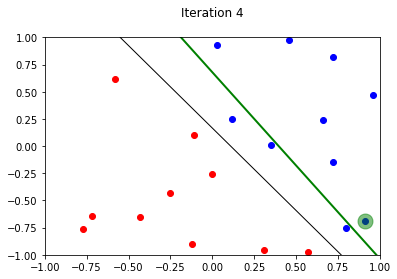


Correct!


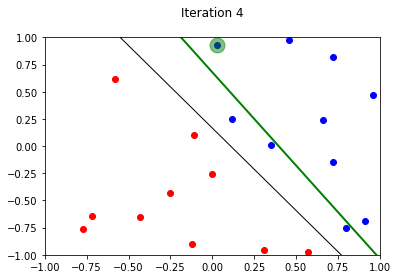


Error - Updating weight to: [-2.64, -1.72]


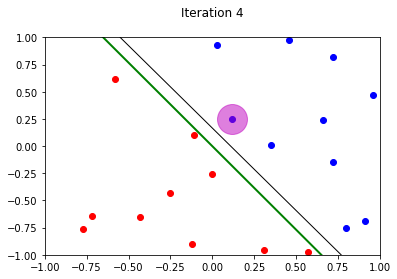


Correct!


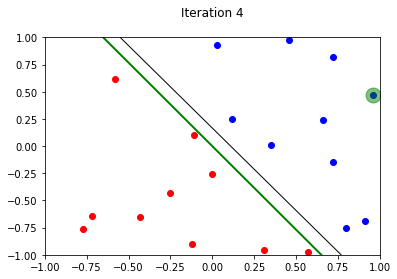


Correct!


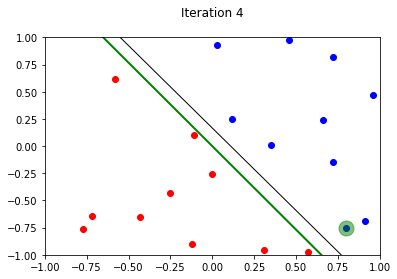


Correct!


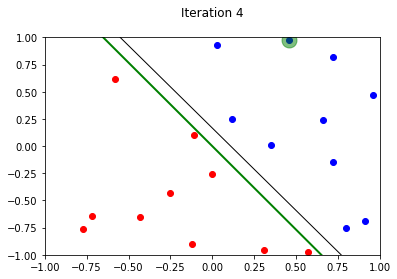


Correct!


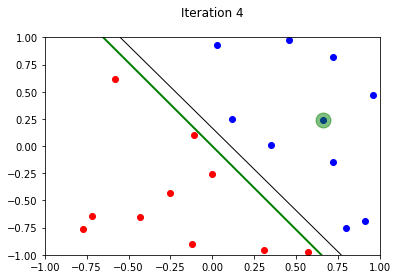


Correct!


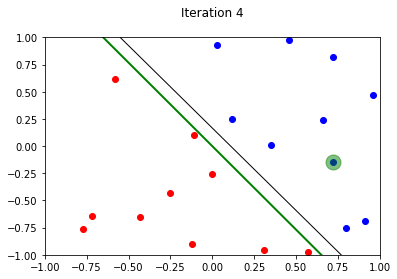


Correct!


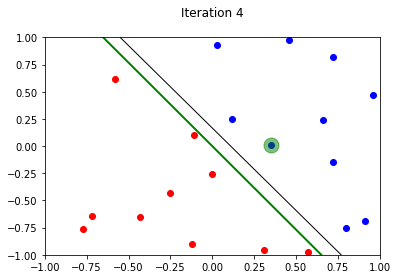


Correct!


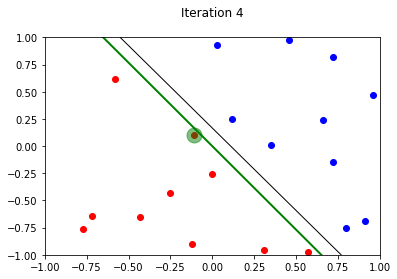


Correct!


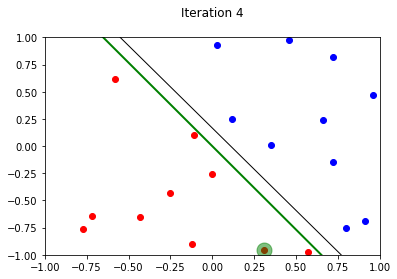


Correct!


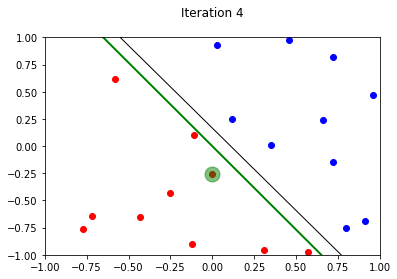


Correct!


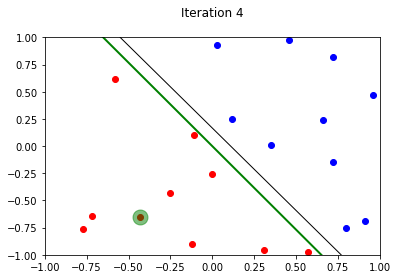


Correct!


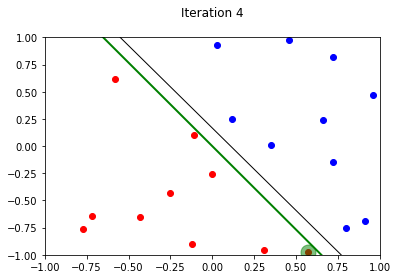


Correct!


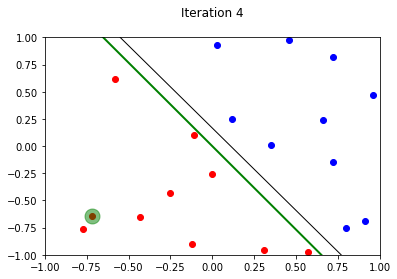


Correct!


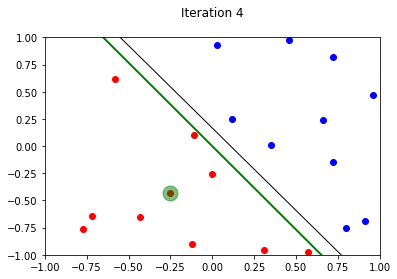


Correct!


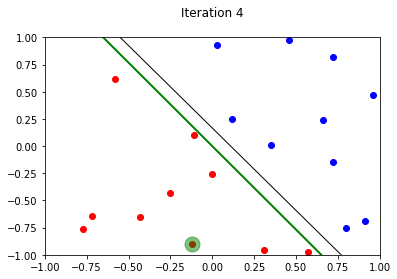


Correct!


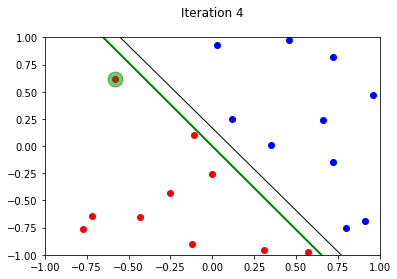


Correct!


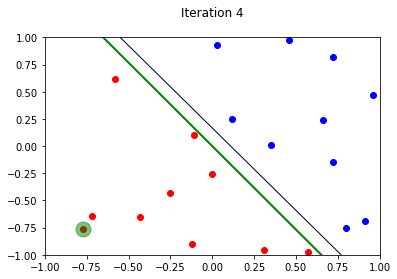


------------------------- ITERATION 5 ------------------------- 

Correct!


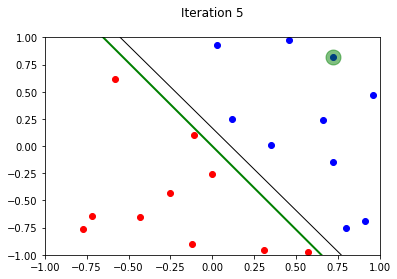


Correct!


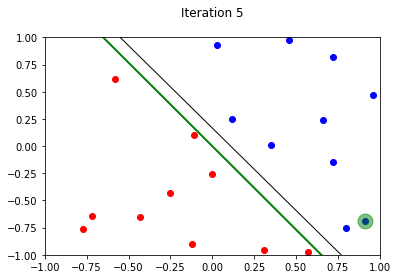


Correct!


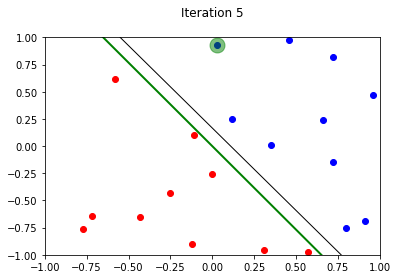


Correct!


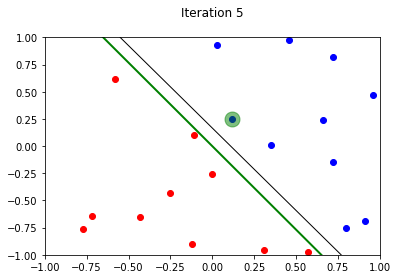


Correct!


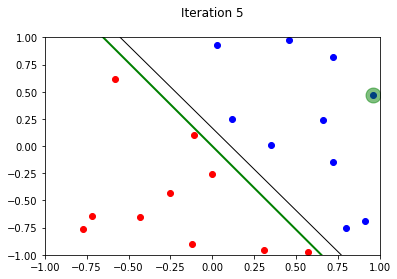


Correct!


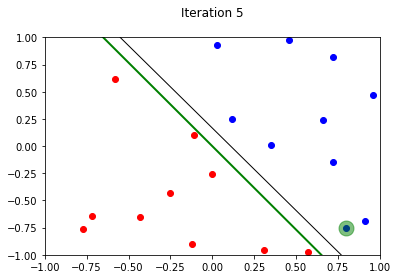


Correct!


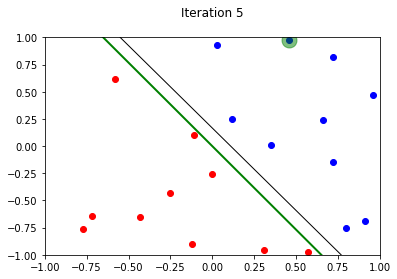


Correct!


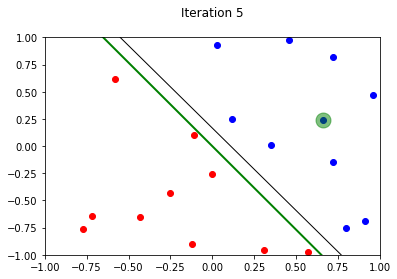


Correct!


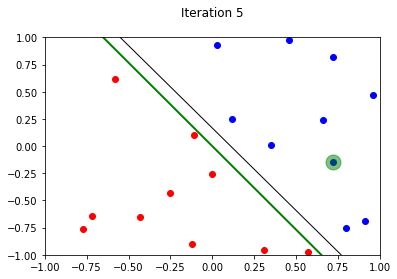


Correct!


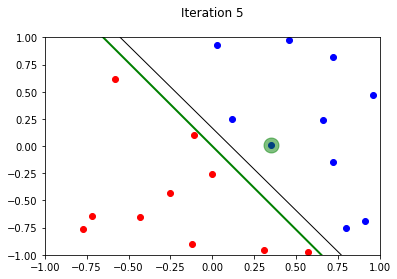


Correct!


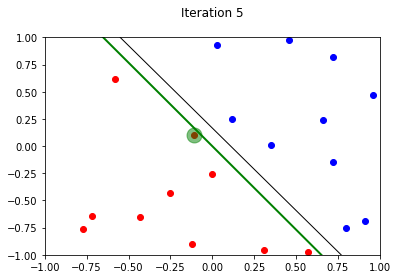


Correct!


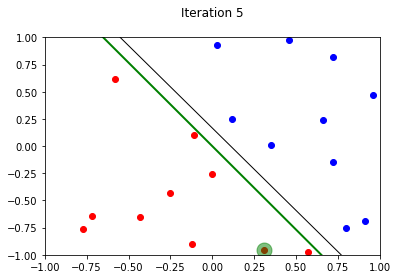


Correct!


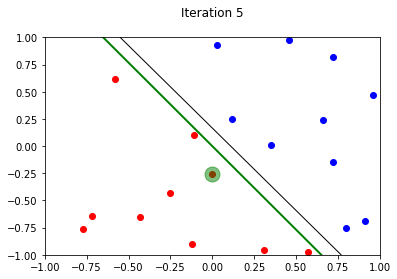


Correct!


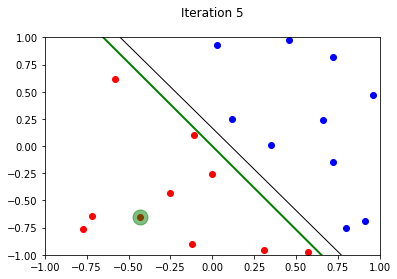


Correct!


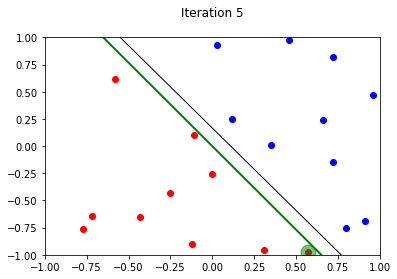


Correct!


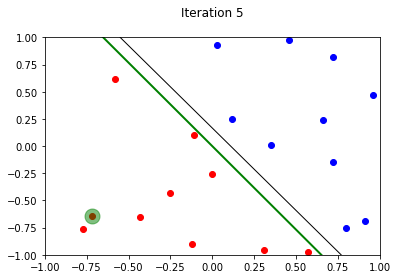


Correct!


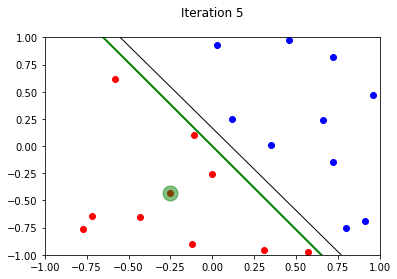


Correct!


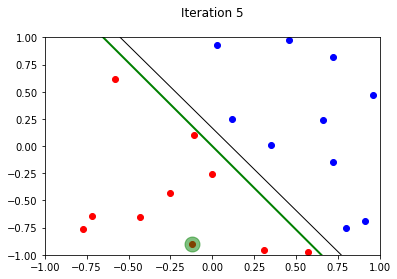


Correct!


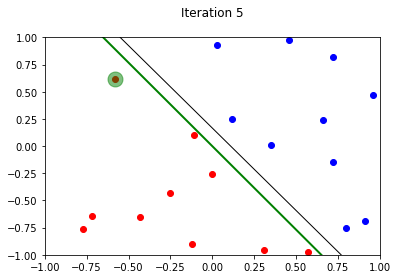


Correct!


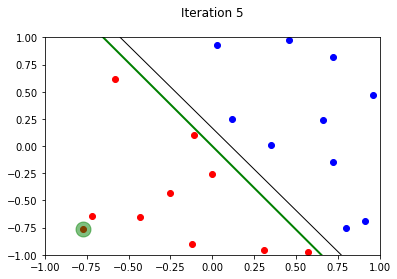


---------------------------------------------------------------

Functionality learned with 5 iterations!

Done!



In [9]:
# Turn on the interactive graphics mode
plt.ion()

for k in range(1, max_iterations):
    hits = 0
    print("\n------------------------- ITERATION "+str(k)+" ------------------------- ")

    for i in range(0,len(x)):
        sum = 0

        # Weighted sum
        for j in range(0,len(x[i])-1):
            sum += x[i][j] * w[j]

        # Output = Bias + Weighted sum
        output = bias + sum

        # Output is determined by the Threshold
        if output > threshold:
            y = 1
        else:
            y = -1     

        # Update the Weights if the output does not match with the Desired output
        if y == x[i][2]:
            hits += 1
            answer = "Correct!"
        else:
            for j in range (0,len(w)):             
                w[j] = w[j] + (learning_rate * x[i][2] * x[i][j])
            bias = bias + learning_rate * x[i][2]
            answer = "Error - Updating weight to: "+str(w)

        # Prints the answer
        if y == 1:
            print("\n"+answer)
        elif y == -1:
            print("\n"+answer)

        # Plot the graph
        plt.clf() # Clear figure
        plt.title('Iteration %s\n' % (str(k)))
        plt.grid(False) # Plot a grid
        plt.xlim(-1,1) # Set x-axis limits
        plt.ylim(-1,1) # Set y-axis limits

        xA = 1
        xB = -1

        if w[1] != 0:
            yA = (- w[0] * xA - bias) / w[1]
            yB = (- w[0] * xB - bias) / w[1]
        else:
            xA = - bias / w[0]
            xB = - bias / w[0]

            yA = 1
            yB = -1

        # Plot the black line, that is, we want to learn the black line as faithfully as possible
        #("Best" Decision Boundary)
        plt.plot([0.77, -0.55], [-1, 1], color='k', linestyle='-', linewidth=1)

        # Generates our green line, that is, our learning line (Decision Boundary)
        plt.plot([xA, xB], [yA, yB], color='g', linestyle='-', linewidth=2)

        # Plot blue points
        x_coords, y_coords = get_points_of_color(data_dictionary, '-1')
        plt.plot(x_coords, y_coords, 'bo')

        # Plot red points
        x_coords, y_coords = get_points_of_color(data_dictionary, '1')
        plt.plot(x_coords, y_coords, 'ro')

        # Highlights the current point
        if answer == 'Correct!':
            # Correct - with green color
            plt.plot(x[i][0], x[i][1], 'go', markersize=15, alpha=.5)
        else:
            # Incorrect - with magenta color
            plt.plot(x[i][0], x[i][1], 'mo', markersize=30, alpha=.5)

        # Show the plot
        plt.show()

        # We were able to control the loop time, so a figure will be updated and displayed
        plt.pause(0.05)

    if hits == len(x):
        print("\n---------------------------------------------------------------")
        print("\nFunctionality learned with "+str(k)+" iterations!")
        break;
    '''
    else:
        print("\n---------------------------------------------------------------")
        print("\nFunctionality not learned!")
        break;
    '''
    
print("\nDone!\n")